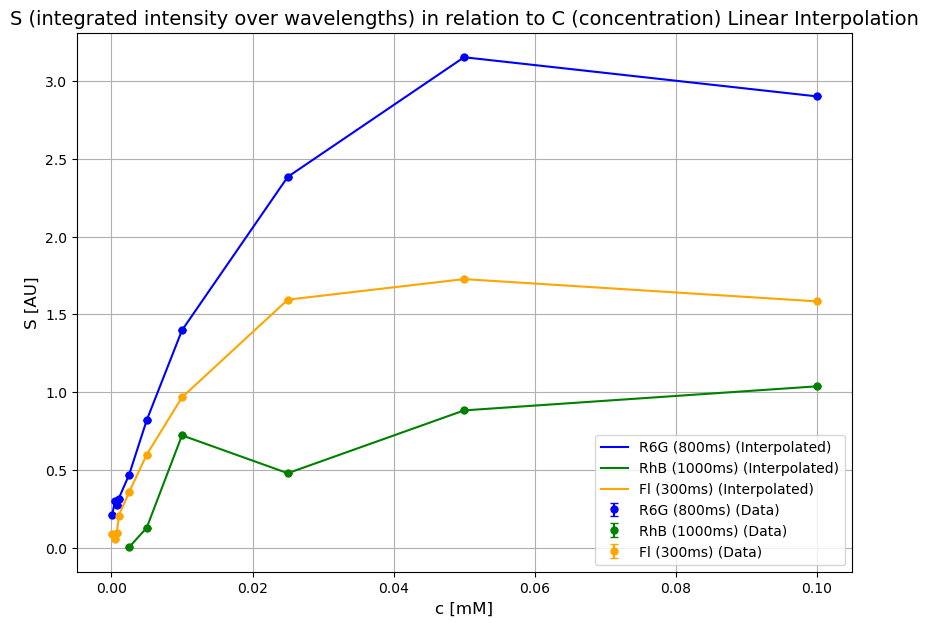

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the Excel file and specify the sheets to process
file_path = r"C:\Users\David1\Downloads\R6G int=300ms.xlsx"
sheets = ['R6G int 800', 'RhB int 1000', 'Fl int 300']

# Set up the plot
plt.figure(figsize=(10, 7))

# Define a dictionary of labels for clarity
labels = {
    'R6G int 800': 'R6G (800ms)',
    'RhB int 1000': 'RhB (1000ms)',
    'Fl int 300': 'Fl (300ms)'
}

# Colors for each dataset
colors = ['blue', 'green', 'orange']

# Process each sheet
for i, sheet in enumerate(sheets):
    # Load data from the sheet
    data = pd.read_excel(file_path, sheet_name=sheet)

    # Extract 'c', 's1', and 'ds1' columns
    c = data['c']
    s = data['s1']
    ds = data['ds1']

    # Linear piecewise interpolation
    interp_func = interp1d(c, s, kind='linear', fill_value="extrapolate")
    c_fine = np.linspace(c.min(), c.max(), 500)
    s_fine = interp_func(c_fine)

    # Plot original data with error bars
    plt.errorbar(c, s, yerr=ds, fmt='o', label=f'{labels[sheet]} (Data)', 
                 capsize=3, markersize=5, color=colors[i])
    # Plot interpolated curve
    plt.plot(c_fine, s_fine, '-', label=f'{labels[sheet]} (Interpolated)', color=colors[i])

# Finalize the plot
plt.xlabel('c [mM]', fontsize=12)
plt.ylabel('S [AU]', fontsize=12)
plt.title('S (integrated intensity over wavelengths) in relation to C (concentration) Linear Interpolation', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


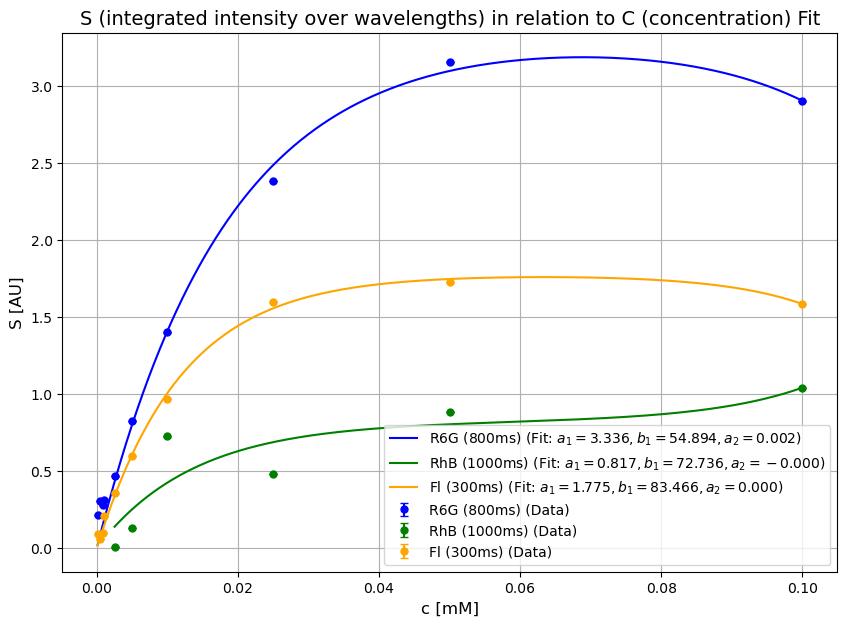

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the Excel file and specify the sheets to process
file_path = r"C:\Users\David1\Downloads\R6G int=300ms.xlsx"
sheets = ['R6G int 800', 'RhB int 1000', 'Fl int 300']

# Define the fitting function: f(x) = a1(1 - exp(-b1 * x)) + a2(1 - exp(b1 * x))
def fit_func(x, a1, b1, a2):
    return a1 * (1 - np.exp(-b1 * x)) + a2 * (1 - np.exp(b1 * x))

# Set up the plot
plt.figure(figsize=(10, 7))

# Define a dictionary of labels for clarity
labels = {
    'R6G int 800': 'R6G (800ms)',
    'RhB int 1000': 'RhB (1000ms)',
    'Fl int 300': 'Fl (300ms)'
}

# Colors for each dataset
colors = ['blue', 'green', 'orange']

# Process each sheet
for i, sheet in enumerate(sheets):
    # Load data from the sheet
    data = pd.read_excel(file_path, sheet_name=sheet)

    # Extract 'c', 's1', and 'ds1' columns
    c = data['c']
    s = data['s1']
    ds = data['ds1']

    # Perform the curve fitting
    initial_guess = [1, 1, 1]  # Initial guesses for a1, b1, a2
    params, params_covariance = curve_fit(fit_func, c, s, p0=initial_guess)

    # Extract fitted parameters
    a1, b1, a2 = params

    # Generate fitted curve
    c_fine = np.linspace(c.min(), c.max(), 500)
    s_fit = fit_func(c_fine, a1, b1, a2)

    # Plot original data with error bars
    plt.errorbar(c, s, yerr=ds, fmt='o', label=f'{labels[sheet]} (Data)', 
                 capsize=3, markersize=5, color=colors[i])
    # Plot fitted curve
    plt.plot(c_fine, s_fit, '-', label=f'{labels[sheet]} (Fit: $a_1={a1:.3f}, b_1={b1:.3f}, a_2={a2:.3f}$)', color=colors[i])

# Finalize the plot
plt.xlabel('c [mM]', fontsize=12)
plt.ylabel('S [AU]', fontsize=12)
plt.title('S (integrated intensity over wavelengths) in relation to C (concentration) Fit', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
